In [5]:
pip install mysql-connector-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 28.3 MB/s eta 0:00:00


In [12]:
pip install pandas matplotlib


In [13]:
import sqlite3

# Connect to new DB (it will create if doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create a simple sales table
cursor.execute('''
CREATE TABLE sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert some test data
sales_data = [
    ('Apples', 30, 0.5),
    ('Oranges', 40, 0.7),
    ('Bananas', 25, 0.3),
    ('Apples', 20, 0.5),
    ('Oranges', 35, 0.7)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

conn.commit()
conn.close()


Sales Summary:
   product  total_qty  revenue
0   Apples         50     25.0
1  Bananas         25      7.5
2  Oranges         75     52.5


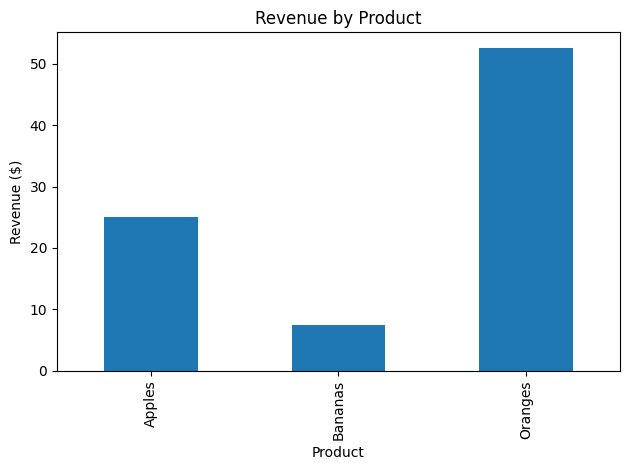

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("sales_data.db")

# SQL query to summarize total quantity and revenue by product
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

# Load into DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Print results
print("Sales Summary:")
print(df)

# Plot bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.xlabel("Product")
plt.tight_layout()

# Show chart
plt.show()

# Optional: Save chart
# plt.savefig("sales_chart.png")
